## 0. Importing Libraries

In [1]:
import sys
import itertools

sys.path.append('../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from knn import KNN

## 1. Reading the data

In [4]:
def read_file(path, num, magic):
    """
    Read buffer & Convert to ndarray
    (ref: http://yann.lecun.com/exdb/mnist/)
    """
    with open(path, 'rb') as f:
        # Check metadata
        assert f.read(4) == magic.to_bytes(4, byteorder='big'), 'Invalid magic bytes'
        assert f.read(4) == num.to_bytes(4, byteorder='big'), 'Data size mismatch'
        if 'images' in path:
            f.read(8) # field for each datum's size
        data = f.read()
    return np.frombuffer(data, dtype=np.uint8)

In [5]:
train_files = {
    'images': 'data/train-images-idx3-ubyte', 
    'labels': 'data/train-labels-idx1-ubyte'
}
test_files = {
    'images': 'data/t10k-images-idx3-ubyte',
    'labels': 'data/t10k-labels-idx1-ubyte'
}

train_sz = 60000
test_sz = 10000
w, h = 28, 28

In [6]:
train_X = read_file(train_files['images'], num = train_sz, magic = 0x803)
train_y = read_file(train_files['labels'], num = train_sz, magic = 0x801)

test_X = read_file(test_files['images'], num = test_sz, magic = 0x803)
test_y = read_file(test_files['labels'], num = test_sz, magic = 0x801)

# Reshape array
train_X = train_X.reshape((train_sz, -1))
test_X = test_X.reshape((test_sz, -1))

# Check shapes
print(train_X.shape, train_y.shape)
print(test_X.shape, test_y.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [7]:
# Downsample the dataset (Too much memory cost with original size)

train_X = train_X[:5000]
train_y = train_y[:5000]

test_X = test_X[:1000]
test_y = test_y[:1000]

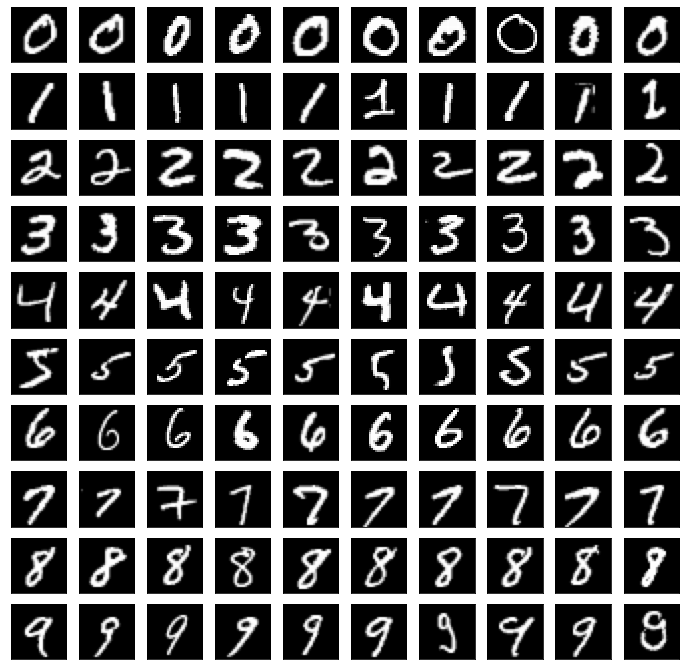

In [8]:
fig, axes = plt.subplots(10, 10, figsize=(12, 12), subplot_kw={'xticks': [], 'yticks': []})

for i, j in itertools.product(range(10), range(10)):
    axes[i][j].imshow(train_X[train_y==i][j].reshape((w, h)), cmap='gray')

## 2. Running the Model

In [17]:
clf = KNN(k=1, dist=1)
clf.train(train_X, train_y)

# preds = clf.predict(train_X)
# print((preds == train_y).mean())

In [18]:
clf.compute_distances(train_X)

100%|██████████| 5000/5000 [01:08<00:00, 72.49it/s]


array([[    0., 34034., 29806., ..., 29551., 19174., 30263.],
       [26382.,     0., 28284., ..., 29821., 19188., 29765.],
       [33170., 37252.,     0., ..., 35585., 18552., 30153.],
       ...,
       [27025., 32643., 26623., ...,     0., 18807., 24264.],
       [28186., 32524., 25736., ..., 32137.,     0., 26193.],
       [29641., 35515., 28215., ..., 28216., 16815.,     0.]])

In [19]:
preds = clf.predict(train_X)
print((preds == train_y).mean())

100%|██████████| 5000/5000 [01:08<00:00, 72.49it/s]


1.0
